In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
%matplotlib inline
from matplotlib.widgets import Slider
from lab_utils_commonn import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

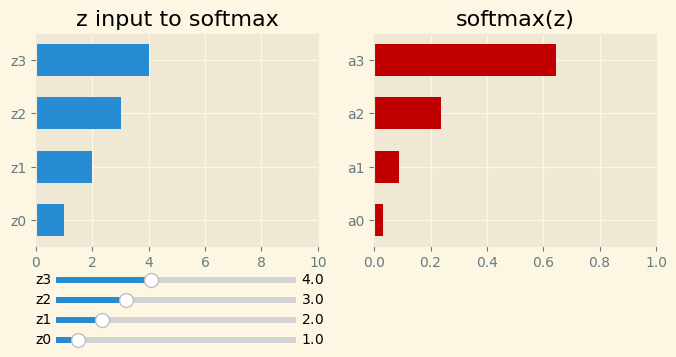

In [3]:
plt.close("all")
plt_softmax(my_softmax)

In [4]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [5]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9593 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3881
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1535
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0891
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0654
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0524
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0421
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0472
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0511
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0347


In [6]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.75e-03 5.06e-03 9.78e-01 1.49e-02]
 [9.95e-01 5.15e-03 2.87e-05 5.20e-05]]
largest value 0.99999964 smallest value 1.0794721e-09


In [7]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
       

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0706  
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.4103
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1771
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.1101
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0794
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0671
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.0550
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0515
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0507


In [8]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
two example output vectors:
 [[-2.54 -2.73  2.77 -0.78]
 [10.34  5.39 -0.63 -6.09]]
largest value 17.115816 smallest value -15.056155


In [9]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.73e-03 3.92e-03 9.64e-01 2.77e-02]
 [9.93e-01 7.08e-03 1.72e-05 7.30e-08]]
largest value 0.9999989 smallest value 1.9546069e-13


In [10]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.54 -2.73  2.77 -0.78], category: 2
[10.34  5.39 -0.63 -6.09], category: 0
[ 7.81  4.61 -0.48 -4.67], category: 0
[-0.26  5.   -0.83 -1.36], category: 1
[ 0.53 -4.38  6.4  -4.75], category: 2
